In [1]:
import os
from sys import argv, stdout, stderr
from ROOT import TCanvas, TLegend, gROOT, TFile, gPad, TPad, TF1, gStyle, TGraphErrors
import sys
from array import array                                                                                                                                                            
import numpy as np
import math
gROOT.SetStyle("Plain")
gROOT.SetBatch(True)

Welcome to JupyROOT 6.12/07


Info in <TBinomialEfficiencyFitter::result>:  chi2 2.354226 ndf 0 


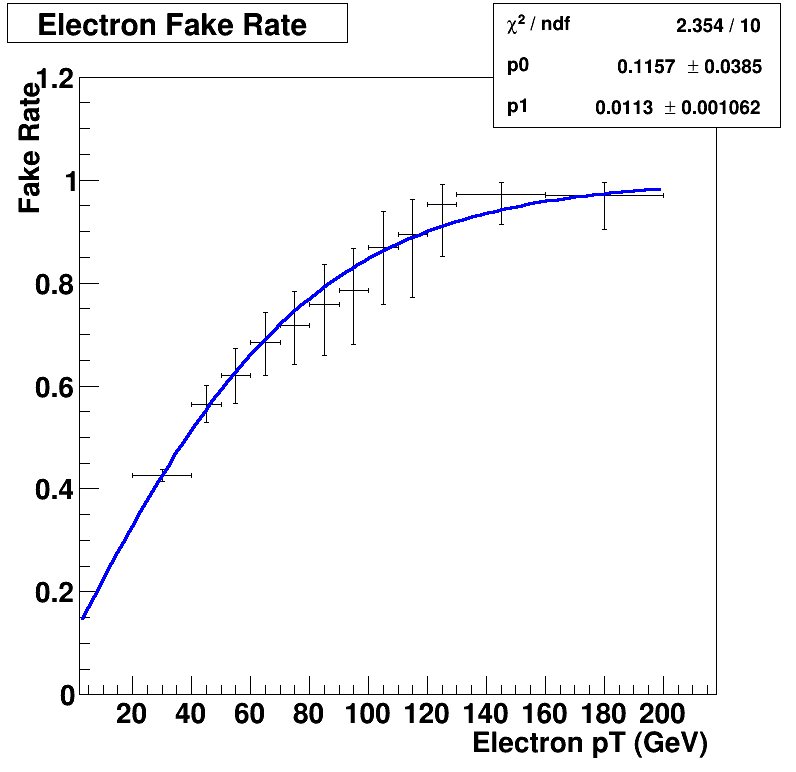

In [2]:
gStyle.SetOptFit(1)
canvas = TCanvas('canvas','canvas',800,800)
grid = TPad("grid", "", 0, 0, 1, 1)
grid.Draw()
grid.cd()
fi = TFile('FakeRate/frElePt.root')
h = fi.Get('fakerate')
h.Draw()
gPad.Update()
graph = h.GetPaintedGraph()
h.SetTitle("Electron Fake Rate; Electron pT (GeV); Fake Rate")
graph.SetMinimum(0.0)
graph.SetMaximum(1.2)
gPad.Update()
f = TF1("Complex law","tanh([0]+x*[1])", 0, 200)
f.SetParameters(0, 0)
f.SetLineColor(4)
f.SetLineStyle(0)
fitResult = h.Fit(f, "S")
steps = 500
x = np.linspace(0.0, 200.0, num=steps)                                                                                                                                    
y = np.array([math.tanh(fitResult.GetParams()[0] + fitResult.GetParams()[1]*x[i]) for i in range(steps)])                                                                             
ynew = np.array([math.tanh((fitResult.GetParams()[0]+fitResult.GetErrors()[0]) + (fitResult.GetParams()[1]+fitResult.GetErrors()[1])*x[i]) for i in range(steps)])                                                                            
ey = ynew - y
zeros = np.zeros(graph.GetN())                                                                                                                                             
interval = TGraphErrors(steps, x, y, zeros, ey)                                                                                                                            
interval.SetFillColor(2)                                                                                                                                                   
interval.SetFillStyle(3002)                                                                                                                                                
#interval.Draw("e3 same")
canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TBinomialEfficiencyFitter::result>:  chi2 46.577397 ndf 0 


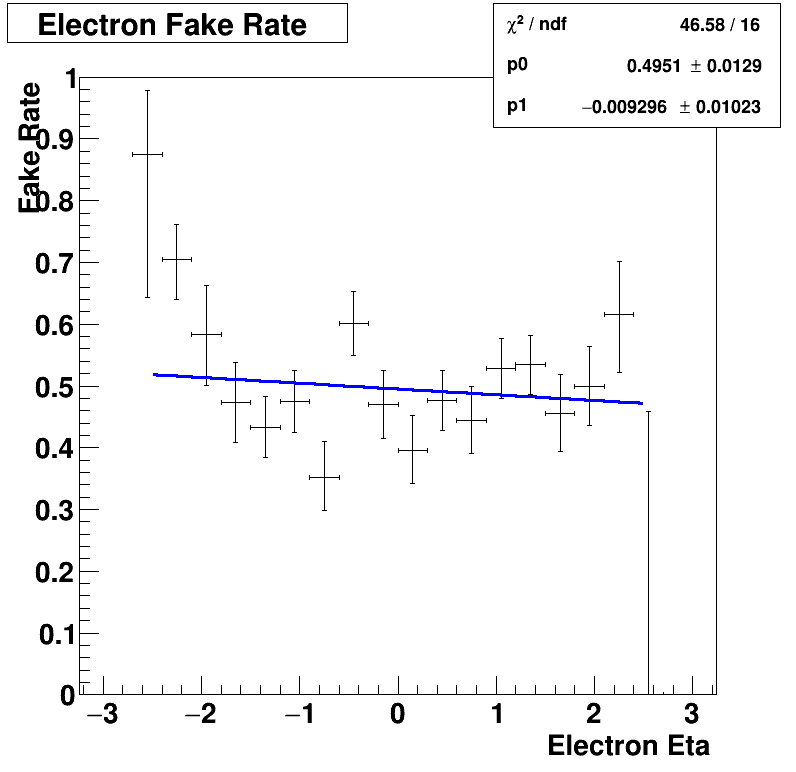

In [3]:
gStyle.SetOptFit(1)
canvas = TCanvas('canvas','canvas',800,800)
grid = TPad("grid", "", 0, 0, 1, 1)
grid.Draw()
grid.cd()
fi = TFile('frEta.root')
h = fi.Get('fakerate')
h.Draw()
gPad.Update()
graph = h.GetPaintedGraph()
h.SetTitle("Electron Fake Rate; Electron Eta; Fake Rate")
graph.SetMinimum(0.0)
graph.SetMaximum(1.0)
gPad.Update()
f = TF1("Linear law","[0]+x*[1]", -2.5, 2.5)
f.SetLineColor(4)
f.SetLineStyle(0)
h.Fit(f)
f.DrawClone("Same")
canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal


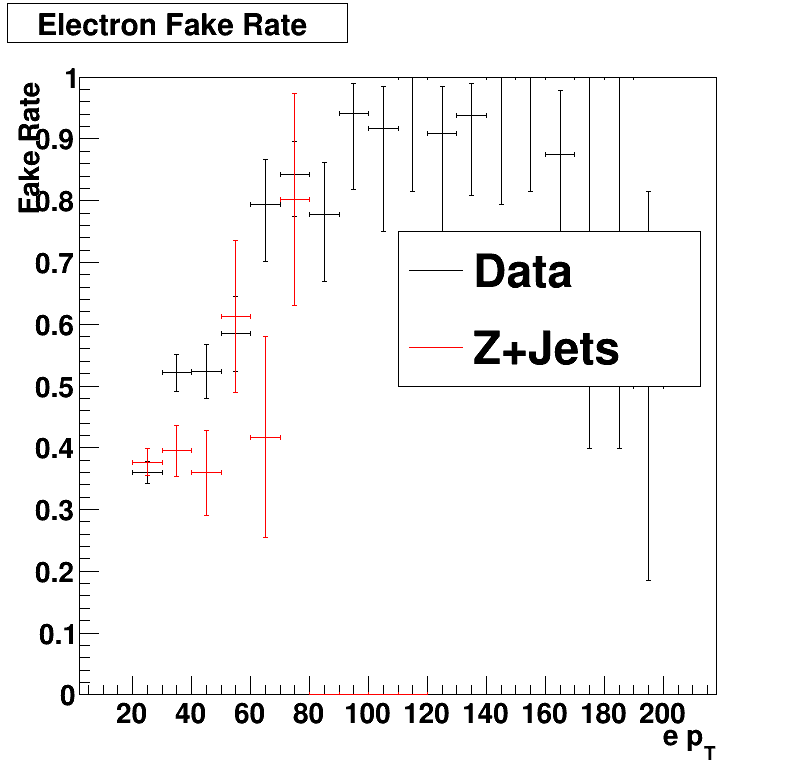

In [4]:
gStyle.SetOptFit(1)
canvas = TCanvas('canvas','canvas',800,800)
legend = TLegend(0.5,0.5,0.88,0.7)
grid = TPad("grid", "", 0, 0, 1, 1)
grid.Draw()
grid.cd()
fi = TFile('frPt.root')
h = fi.Get('fakerate')
hdy = fi.Get('dyfakerate')
hdy.SetLineColor(2)
legend.AddEntry(h,"Data","l")
legend.AddEntry(hdy,"Z+Jets","l")
h.Draw()
hdy.Draw("SAME")
gPad.Update()
graph = h.GetPaintedGraph()
h.SetTitle("Electron Fake Rate; e p_{T}; Fake Rate")
graph.SetMinimum(0)
graph.SetMaximum(1.0)
gPad.Update()
legend.Draw()
canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal


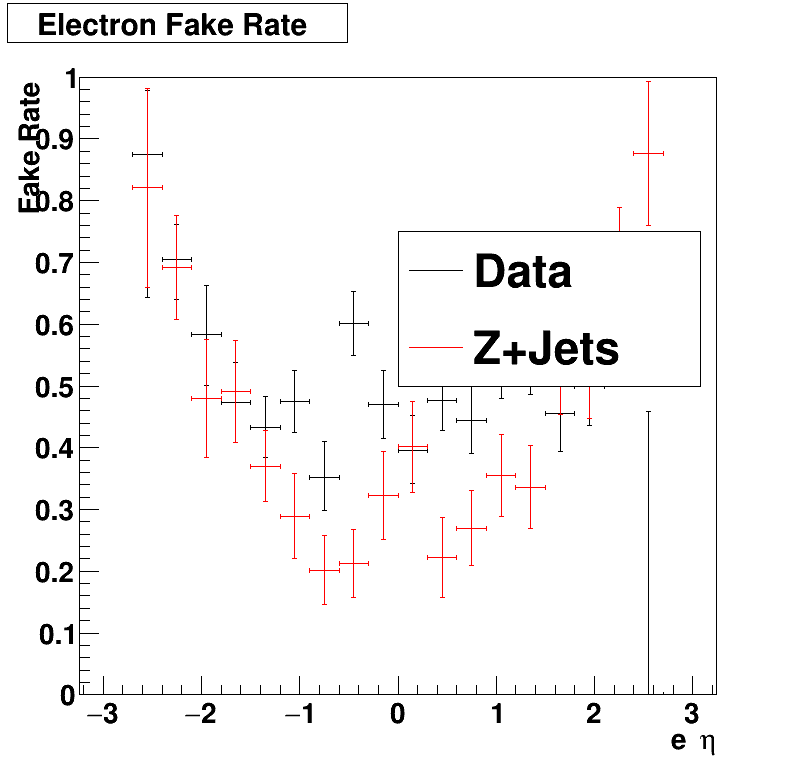

In [5]:
gStyle.SetOptFit(1)
canvas = TCanvas('canvas','canvas',800,800)
legend = TLegend(0.5,0.5,0.88,0.7)
grid = TPad("grid", "", 0, 0, 1, 1)
grid.Draw()
grid.cd()
fi = TFile('frEta.root')
h = fi.Get('fakerate')
hdy = fi.Get('dyfakerate')
hdy.SetLineColor(2)
legend.AddEntry(h,"Data","l")
legend.AddEntry(hdy,"Z+Jets","l")
h.Draw()
hdy.Draw("SAME")
gPad.Update()
graph = h.GetPaintedGraph()
h.SetTitle("Electron Fake Rate; e #eta; Fake Rate")
graph.SetMinimum(0)
graph.SetMaximum(1.0)
gPad.Update()
legend.Draw()
canvas.Draw()

In [3]:
f = TFile("FRMME.root", "Recreate")
fitResult.Write("EleFR")
f.Close()